## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
pd.options.mode.chained_assignment = None
from mpl_toolkits import mplot3d

## Defining a function to create and train neural network

In [2]:
def linear(x):
    return x

def linear_der(x):
    return 1

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    #return sigmoid(x)*(1-sigmoid(x))
    return x*(1-x)

In [3]:
def neural_network(data,label,neuron_hidden):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    hidden = neuron_hidden
    weight_1 = np.random.randn(features+1,hidden)
    weight_2 = np.random.randn(hidden+1,1)
    
    
    epoch = 0
    epoch_error = []
    while epoch<10000:
        epoch+=1
        
        #feedforward
        feed_1 = np.dot(data,weight_1)
        feed_1_act = sigmoid(feed_1)
        #feed_1_act = linear(feed_1)
        feed_1_act = np.hstack((np.ones((feed_1_act.shape[0],1)),feed_1_act))
        
        
        feed_2 = np.dot(feed_1_act,weight_2)
        feed_2_act = feed_2
        #feed_2_act = linear(feed_2)

        
        #backpropagation
        
        error = label-feed_2_act
        error_1 = np.sum(error, axis = 1)
        error_av = np.sum(error_1**2)/(2*samples)
        epoch_error.append((epoch,error_av))
        #error = error*(2/samples)
        
        #slope_output_layer = linear_der(feed_2_act)*(2/samples)
        #slope_hidden_layer = sigmoid_der(feed_1_act)*(2/samples)
        slope_output_layer = linear_der(feed_2_act)*(2/samples)
        slope_hidden_layer = sigmoid_der(feed_1_act)*(2/samples)

        
        
        
        delta_output = np.multiply(error,slope_output_layer)
        error_hidden = np.dot(delta_output,weight_2.T)

        delta_hidden = np.multiply(error_hidden,slope_hidden_layer)
        delta_hidden = np.delete(delta_hidden,0,axis=1)
        
        weight_2 += 0.4*np.dot(feed_1_act.T,delta_output)

        
        weight_1 += 0.4*np.dot(data.T, delta_hidden)


    
    return weight_1, weight_2,epoch_error
    
        

In [4]:
def predict(data, w1, w2):   
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    
    feed_1 = np.dot(data,w1)
    feed_1_act = sigmoid(feed_1)
    feed_1_act = np.hstack((np.ones((feed_1_act.shape[0],1)),feed_1_act))

    feed_2 = np.dot(feed_1_act,w2)
    feed_2_act = linear(feed_2)
    
    return feed_2_act

## Univariate case

In [5]:
uni = pd.read_csv(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Regression\UnivariateData\30.csv")

In [6]:
uni.columns = ['Independent','Dependent']
uni

,Independent,Dependent
0,0.953,1.9991
1,0.056,2.7593
2,0.278,2.1659
3,0.620,2.1595
4,0.834,2.0021
...,...,...
995,0.507,1.9702
996,0.085,2.6445
997,0.143,2.2779
998,0.803,1.9213


## Plotting the values

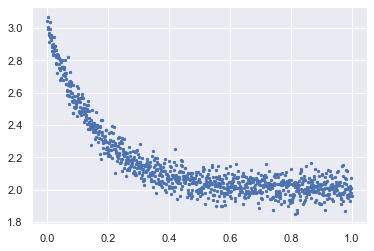

In [7]:
sns.set()
plt.scatter(uni['Independent'],uni['Dependent'], s = 5.4)

## Divide into train validate and test

In [8]:
#shuffle the data
uni = uni.sample(frac=1)

train_set = uni.iloc[:600,:]
validate_set = uni.iloc[600:800,:]
test_set = uni.iloc[800:,:]

## Train the neural network for train data 

In [9]:
w_train_1, w_train_2, error_epoch_train= neural_network(np.array(train_set.Independent).reshape((-1,1)),np.array(train_set.Dependent).reshape((-1,1)),15)

In [10]:
predicted_value = predict(np.array(train_set.Independent).reshape((-1,1)),w_train_1,w_train_2)

## Define a function to print the average error

In [11]:
def avg_error(label,predicted,type_Set):
    total_err = 0
    original = label
    predicted = predicted
    for i in range(predicted.shape[0]):
        total_err += (predicted[i][0]-original[i][0])**2
    total_err = total_err/(2*original.shape[0])
    print(f"Average error for {type_Set} is {total_err}")

## Total error for training samples when validation set is not used

In [12]:
avg_error(np.array(train_set.Dependent).reshape((-1,1)),predicted_value,"Training before Validation")

Average error for Training before Validation is 0.005239994232777856


## Total error for test samples before validation

In [13]:
predicted_value = predict(np.array(test_set.Independent).reshape((-1,1)),w_train_1,w_train_2)
avg_error(np.array(test_set.Dependent).reshape((-1,1)),predicted_value,"Test samples before validation")

Average error for Test samples before validation is 0.005258006745403451


## validation process

In [14]:
validation_data = pd.concat([train_set,validate_set])

In [15]:
w_1_valid, w_2_valid, error_epoch_valid = neural_network(np.array(validation_data.Independent).reshape((-1,1)),np.array(validation_data.Dependent).reshape((-1,1)),15)

## Calculating the average errors for new validation set and test set

In [16]:
predicted_value_valid = predict(np.array(validation_data.Independent).reshape((-1,1)),w_1_valid,w_2_valid)
avg_error(np.array(validation_data.Dependent).reshape((-1,1)),predicted_value_valid,"Train data after validation")

Average error for Train data after validation is 0.006665792664178632


In [17]:
predicted_value_test = predict(np.array(test_set.Independent).reshape((-1,1)),w_1_valid,w_2_valid)
avg_error(np.array(test_set.Dependent).reshape((-1,1)),predicted_value_test,"Test data after validation")

Average error for Test data after validation is 0.006678793184356945


## Plotting the data together

[]

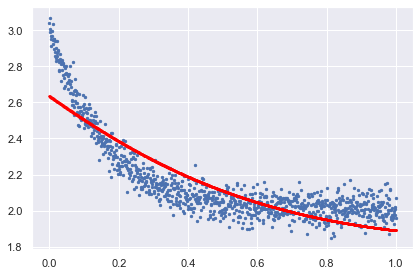

In [18]:
x_lab = np.linspace(0,1,1000)
predict_x_lab = predict(x_lab.reshape((-1,1)),w_1_valid,w_2_valid)
sns.set()
plt.scatter(uni['Independent'],uni['Dependent'], s = 5.4)
plt.scatter(x_lab,(predict_x_lab).reshape((1,-1)).ravel(),color = "red",s = 2.5)
plt.tight_layout()
plt.plot()

## Plotting the error vs epoch

Text(0.5, 1.0, 'Error vs Epoch')

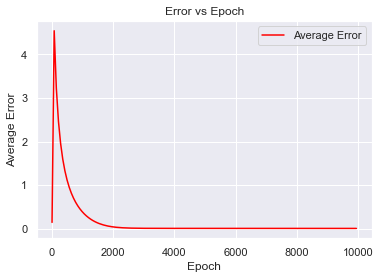

In [19]:
sns.set()
plt.plot(*zip(*error_epoch_valid[::70]),color="red",label = "Average Error")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.legend()
plt.title("Error vs Epoch")

## Bivariate case

In [20]:
bivar = pd.read_csv(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Regression\BivariateData\30.csv")
bivar.columns = ['Independent1','Independent2','Dependent']

In [21]:
bivar

,Independent1,Independent2,Dependent
0,0.33,0.26,7.9469
1,0.92,0.70,7.2077
2,0.10,0.64,6.9303
3,0.13,0.05,4.9484
4,0.25,0.22,6.8218
...,...,...,...
10195,0.14,0.75,7.6303
10196,0.76,0.01,5.9899
10197,0.56,0.63,10.3950
10198,0.15,0.42,6.4733


## Plotting in 3d

Text(0.5, 0, '$Dependent$')

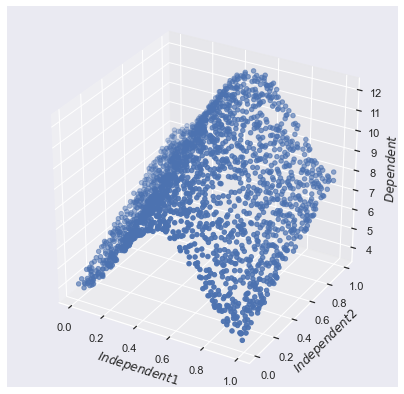

In [22]:

from mpl_toolkits import mplot3d
x = np.array(bivar.Independent1)
y = np.array(bivar.Independent2)
z = np.array(bivar.Dependent)

fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(x[::5],y[::5],z[::5])
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")


## Dividing into train, validate and test

In [23]:
bivar = bivar.sample(frac = 1)


In [24]:
train_set_bv = bivar.iloc[0:6120,:]
validate_set_bv = bivar.iloc[6120:8160,:]
test_set_bv = bivar.iloc[8160:,:]

## Training the neural network for training data

In [25]:
w_train_1_bv, w_train_2_bv, error_epoch_train_bv= neural_network(np.array(train_set_bv[['Independent1','Independent2']]).reshape((-1,2)),np.array(train_set_bv.Dependent).reshape((-1,1)),15)

## Total error of training samples when validation is not used

In [26]:
predicted_value_bv = predict(np.array(train_set_bv[['Independent1','Independent2']]).reshape((-1,2)),w_train_1_bv,w_train_2_bv)

In [27]:
avg_error(np.array(train_set_bv.Dependent).reshape((-1,1)),predicted_value_bv,"Training without validation")

Average error for Training without validation is 0.31534099365836393


## Total testing error when validation is not used

In [28]:
predicted_value_bv = predict(np.array(test_set_bv[['Independent1','Independent2']]).reshape((-1,2)),w_train_1_bv,w_train_2_bv)

In [29]:
avg_error(np.array(test_set_bv.Dependent).reshape((-1,1)),predicted_value_bv,"Tesing without validation")

Average error for Tesing without validation is 0.3144853038952044


## Retraining using validation data

In [30]:
validation_data_bv = pd.concat([train_set_bv,validate_set_bv]) 

In [31]:
w_1_valid_bv, w_2_valid_bv, error_epoch_valid_bv = neural_network(np.array(validation_data_bv[['Independent1','Independent2']]).reshape((-1,2)),np.array(validation_data_bv.Dependent).reshape((-1,1)),15)

## Total error of training samples including validation

In [32]:
predicted_value_bv = predict(np.array(validation_data_bv[['Independent1','Independent2']]).reshape((-1,2)),w_1_valid_bv,w_2_valid_bv)

In [33]:
avg_error(np.array(validation_data_bv.Dependent).reshape((-1,1)),predicted_value_bv,"Training with validation")

Average error for Training with validation is 0.4735183150081052


## Total error of testing set after validation

In [34]:
predicted_value_test_bv = predict(np.array(test_set_bv[['Independent1','Independent2']]).reshape((-1,2)),w_1_valid_bv,w_2_valid_bv)

In [35]:
avg_error(np.array(test_set_bv.Dependent).reshape((-1,1)),predicted_value_test_bv,"testing with validation")

Average error for testing with validation is 0.47895720605250747


## Plotting the data and line

In [36]:
x1 = np.array(validate_set_bv[['Independent1','Independent2']])
y1 = np.array(validate_set_bv.Dependent)

x2 = np.array(test_set_bv[['Independent1','Independent2']])
y2 = np.array(test_set_bv.Dependent)


In [37]:
x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
X,Y = np.meshgrid(x,y)
z = predict((np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))),w_1_valid_bv,w_2_valid_bv)
z = z.reshape(X.shape)

In [38]:
predicted_value_test_bv.shape

(2040, 1)

In [39]:
x1.shape

(2040, 2)

<IPython.core.display.Javascript object>


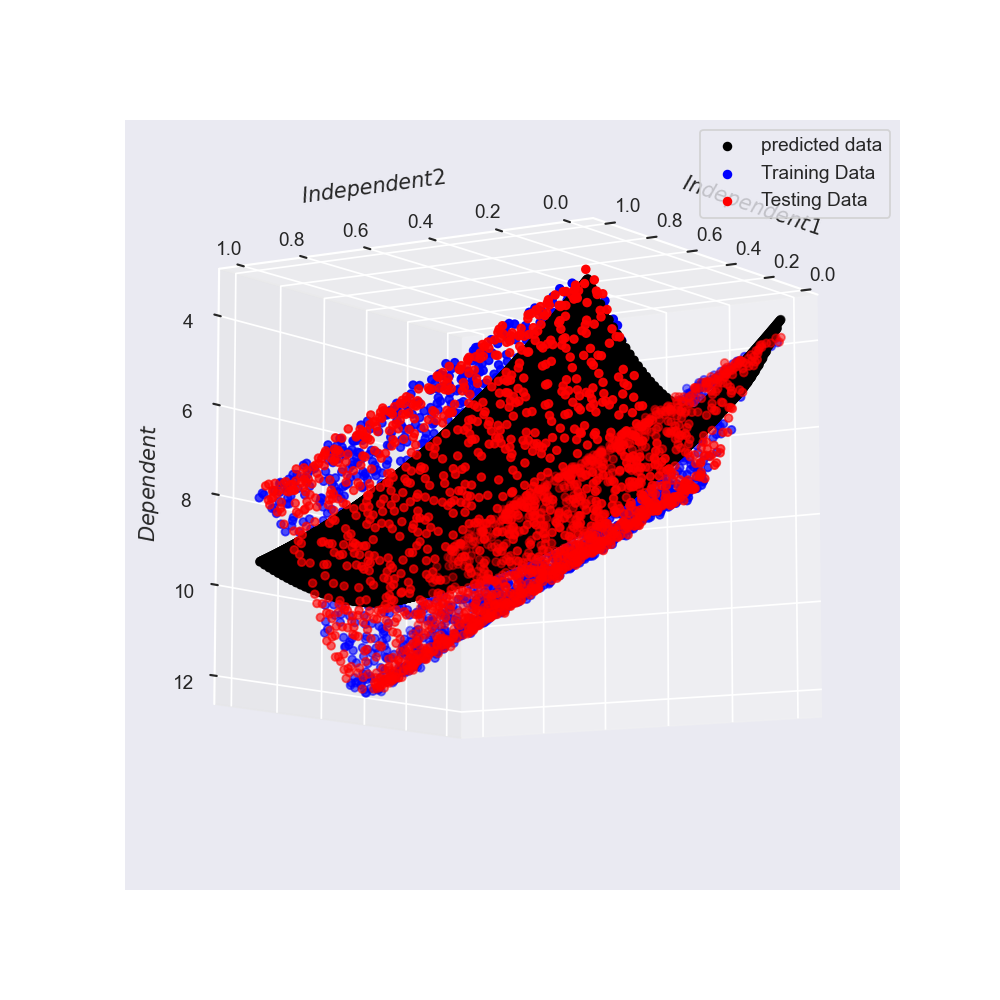

In [42]:
%matplotlib notebook
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')
ax.scatter3D(X.ravel()[::20],Y.ravel()[::20],z.ravel()[::20],color="black",label = "predicted data")
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")


ax.scatter3D(*zip(*x1[::1]),y1[::1], label="Training Data", color = "blue")
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")
plt.legend()

ax.scatter3D(*zip(*x2[::1]),y2[::1], label="Testing Data", color = "red")
ax.set_xlabel("$Independent 1$")
ax.set_ylabel("$Independent 2$")
ax.set_zlabel("$Dependent$")
plt.legend()